In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing  os for directory and shutil to copy files from one directory to the other
import os, shutil

original_dataset_dir = "/content/drive/MyDrive/Cat Dog Data"

# create another directory named cat_dog parallel to main data, where we will create train, validation and test directory to store equal amount of images of dog and cat by copying it from main data directory
base_dir = "/content/drive/MyDrive/Cat Dog Data/cat-dog"

In [3]:
os.mkdir(base_dir) #to create the base_dir

In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [6]:
# connect dog and cat directory in train, validation and test
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

val_cats_dir = os.path.join(validation_dir, 'cats')
val_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [7]:
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

os.mkdir(val_cats_dir)
os.mkdir(val_dogs_dir)

os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

**Now we want to copy files from original directory to the base_dir. We will copy 1000 dog and cat images to the dog and cat folder in train directory.**

In [8]:
# making a list of image captions of cat using list comprehension
cnames = [f"cat.{i}.jpg" for i in range(1000)]

# loop over caption names in cnames and define a variable src by connecting original directory with the caption,
# and then copy image from src to dest,  where dest variable is created by connecting train_cats_dir with the caption.
for cname in cnames:
    src = os.path.join(original_dataset_dir, cname)
    dest = os.path.join(train_cats_dir, cname)
    shutil.copyfile(src, dest)

In [9]:
cnames = [f"cat.{i}.jpg" for i in range(1000,1500)]
for cname in cnames:
    src = os.path.join(original_dataset_dir, cname)
    dest = os.path.join(val_cats_dir, cname)
    shutil.copyfile(src, dest)

In [10]:
cnames = [f"cat.{i}.jpg" for i in range(1500,2000)]
for cname in cnames:
    src = os.path.join(original_dataset_dir, cname)
    dest = os.path.join(test_cats_dir, cname)
    shutil.copyfile(src, dest)

In [11]:
# making a list of image captions of dog using list comprehension
dnames = [f"dog.{i}.jpg" for i in range(1000)]

# loop over caption names in cnames and define a variable src by connecting original directory with the caption,
# and then copy image from src to dest,  where dest variable is created by connecting train_dogs_dir with the caption.
for dname in dnames:
    src = os.path.join(original_dataset_dir, dname)
    dest = os.path.join(train_dogs_dir, dname)
    shutil.copyfile(src, dest)

In [12]:
dnames = [f"dog.{i}.jpg" for i in range(1000,1500)]
for dname in dnames:
    src = os.path.join(original_dataset_dir, dname)
    dest = os.path.join(val_dogs_dir, dname)
    shutil.copyfile(src, dest)

In [13]:
dnames = [f"dog.{i}.jpg" for i in range(1500,2000)]
for dname in dnames:
    src = os.path.join(original_dataset_dir, dname)
    dest = os.path.join(test_dogs_dir, dname)
    shutil.copyfile(src, dest)

In [14]:
print("The length of cats in train: {}".format(len(os.listdir(train_cats_dir))))
print("The length of dogs in train: {}".format(len(os.listdir(train_dogs_dir))))

print("The length of cats in validation: {}".format(len(os.listdir(val_cats_dir))))
print("The length of dogs in validation: {}".format(len(os.listdir(val_dogs_dir))))

print("The length of cats in test: {}".format(len(os.listdir(test_cats_dir))))
print("The length of dogs in test: {}".format(len(os.listdir(test_dogs_dir))))

The length of cats in train: 1000
The length of dogs in train: 1000
The length of cats in validation: 500
The length of dogs in validation: 500
The length of cats in test: 500
The length of dogs in test: 500


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

#3 convolutional layers, 3 maxpooling layers and then 2 dense layers
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [17]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')
#flow_from_directory= generates batches of image data from the directory
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history = model.fit(train_generator,
                    steps_per_epoch =100,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 61s 602ms/step - loss: 0.6916 - acc: 0.5370 - val_loss: 0.6765 - val_acc: 0.6340
Epoch 2/10
100/100 [==============================] - 61s 607ms/step - loss: 0.6616 - acc: 0.6125 - val_loss: 0.6484 - val_acc: 0.6010
Epoch 3/10
100/100 [==============================] - 62s 616ms/step - loss: 0.6134 - acc: 0.6750 - val_loss: 0.6894 - val_acc: 0.5850
Epoch 4/10
100/100 [==============================] - 61s 612ms/step - loss: 0.5766 - acc: 0.7045 - val_loss: 0.6016 - val_acc: 0.6720
Epoch 5/10
100/100 [==============================] - 60s 602ms/step - loss: 0.5405 - acc: 0.7360 - val_loss: 0.5897 - val_acc: 0.6740
Epoch 6/10
100/100 [==============================] - 61s 607ms/step - loss: 0.5115 - acc: 0.7540 - val_loss: 0.5900 - val_acc: 0.6920
Epoch 7/10
100/100 [==============================] - 60s 604ms/step - loss: 0.4851 - acc: 0.7705 - val_loss: 0.6524 - val_acc: 0.6350
Epoch 8/10
100/100 [==============================] - 6

In [21]:
model.save('cats_and_dogs_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
acc = history.history['acc']
acc

[0.5370000004768372,
 0.612500011920929,
 0.675000011920929,
 0.7045000195503235,
 0.7360000014305115,
 0.7540000081062317,
 0.7705000042915344,
 0.7929999828338623,
 0.8080000281333923,
 0.8230000138282776]

In [23]:
val_acc = history.history['val_acc']
val_acc

[0.6340000033378601,
 0.6010000109672546,
 0.5849999785423279,
 0.671999990940094,
 0.6740000247955322,
 0.6919999718666077,
 0.6349999904632568,
 0.7049999833106995,
 0.699999988079071,
 0.6830000281333923]

In [24]:
loss = history.history['loss']
loss

[0.6916278600692749,
 0.6615551114082336,
 0.6134076714515686,
 0.5765706300735474,
 0.5404893159866333,
 0.5115146040916443,
 0.4851170778274536,
 0.45816680788993835,
 0.42485687136650085,
 0.39660272002220154]

In [25]:
val_loss = history.history['val_loss']
val_loss

[0.676457941532135,
 0.6484342217445374,
 0.6893836259841919,
 0.6016188263893127,
 0.589689314365387,
 0.5900436043739319,
 0.6524221897125244,
 0.5809502005577087,
 0.5681669116020203,
 0.6085086464881897]

**Plotting accuracies and loss**

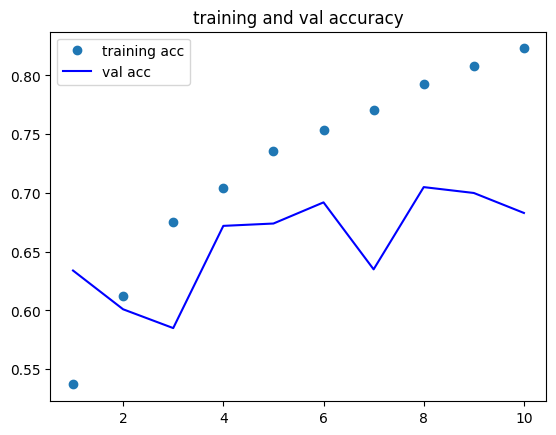

In [26]:
import matplotlib.pyplot as plt
epochs = range(1, len(acc)+1)
plt.plot(epochs,acc,'o',label='training acc')
plt.plot(epochs,val_acc,'b',label='val acc')
plt.title('training and val accuracy')
plt.legend()

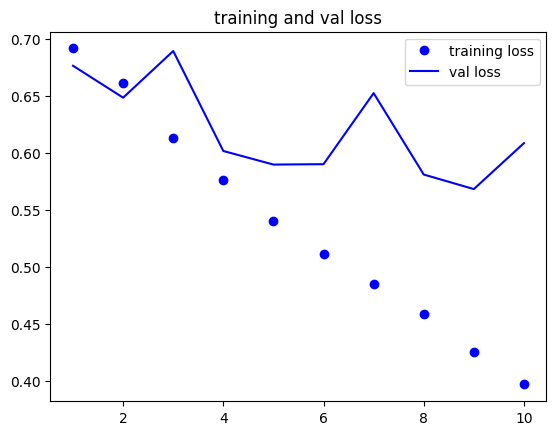

In [27]:
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='val loss')
plt.title('training and val loss')
plt.legend()

#By Data Augmentation

In [28]:
datagen = ImageDataGenerator(
    rescale =1./255,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')
#perform image augmentation

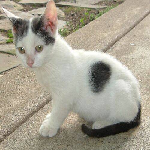

In [29]:
# displaying some augmented images
import keras.utils as image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path,target_size=(150,150))
img

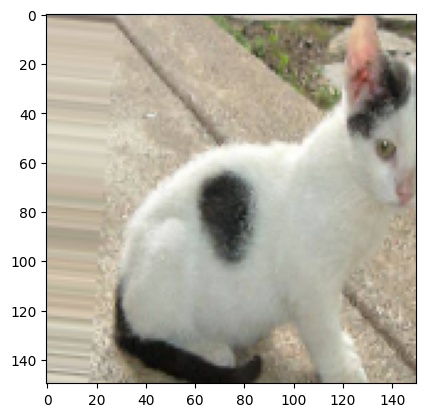

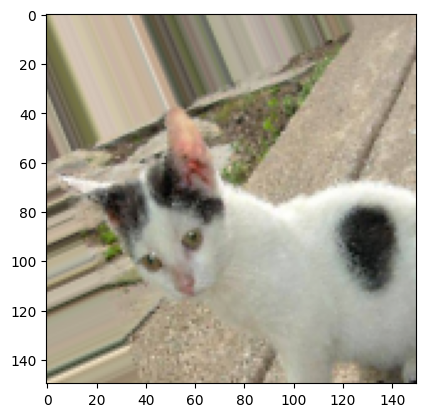

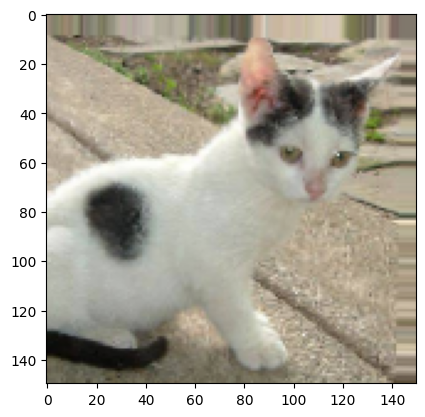

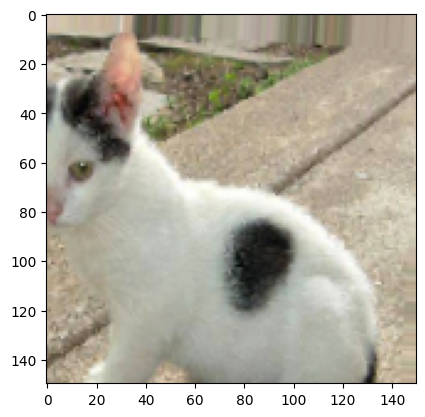

In [30]:
# converting image into array
x = image.img_to_array(img) # --> gives (150,150,3) array
x = x.reshape((1,) + x.shape) # reshapes to (1,150,150,3) array

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break

plt.show()

In [31]:
# new model creation like we did before
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['acc'])

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#training with augmented Data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
# defining train_generator and validation_generator again
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                   target_size = (150, 150),
                                   batch_size = 32,
                                   class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator)

Epoch 1/5
63/63 [==============================] - 88s 1s/step - loss: 0.6963 - acc: 0.5310 - val_loss: 0.6819 - val_acc: 0.5750
Epoch 2/5
63/63 [==============================] - 80s 1s/step - loss: 0.6818 - acc: 0.5380 - val_loss: 0.6775 - val_acc: 0.5380
Epoch 3/5
63/63 [==============================] - 80s 1s/step - loss: 0.6744 - acc: 0.5745 - val_loss: 0.6582 - val_acc: 0.6020
Epoch 4/5
63/63 [==============================] - 80s 1s/step - loss: 0.6683 - acc: 0.5900 - val_loss: 0.6526 - val_acc: 0.6130
Epoch 5/5
63/63 [==============================] - 83s 1s/step - loss: 0.6579 - acc: 0.5980 - val_loss: 0.6379 - val_acc: 0.6250


In [35]:
model.save('cats_and_dogs_small_model2.h5')

In [36]:
acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

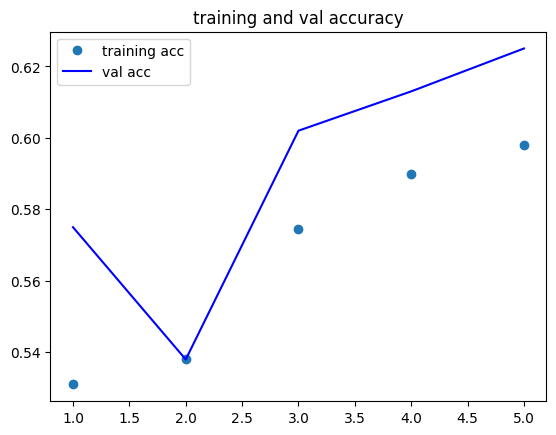

In [37]:
import matplotlib.pyplot as plt
epochs = range(1, len(acc)+1)
plt.plot(epochs,acc,'o',label='training acc')
plt.plot(epochs,val_acc,'b',label='val acc')
plt.title('training and val accuracy')
plt.legend()

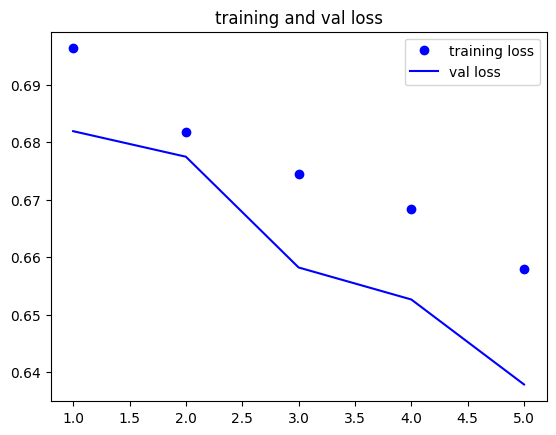

In [38]:
plt.plot(epochs,train_loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='val loss')
plt.title('training and val loss')
plt.legend()